# Optical Character Recognition(OCR) with Tesseract, OpenCV, and Python

## Building word clouds on Review images

Step 1: Create list of all the available review images

In [2]:
import os

folderPath = "Reviews"
myRevList = os.listdir(folderPath)
myRevList

['1.PNG',
 '10.PNG',
 '11.PNG',
 '12.PNG',
 '13.PNG',
 '14.PNG',
 '15.PNG',
 '2.PNG',
 '3.PNG',
 '4.PNG',
 '5.PNG',
 '6.PNG',
 '7.PNG',
 '8.PNG',
 '9.PNG']

Step 2: View all the images using `cv2.imshow()` method

In [3]:
for image in  myRevList:
    img = cv2.imread(f'{folderPath}/{image}')
    cv2.imshow("Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Step 3: Read text from images using pytesseract

In [5]:
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'

corpus = []
for images in myRevList:
    img = cv2.imread(f'{folderPath}/{images}')
    if img is None:
        corpus.append("Could not read the image.")
    else:
        rev = pytesseract.image_to_string(img)
        corpus.append(rev)

list(corpus)
corpus

['Dead pixel on new ipad 8th gen, Was request for a replacemnt, but no luck only refund available.\n\nIts 32 GB, but out of the box only 15gb available. Installed 2-3 apps and it became 11gb. Beware, ios apps\nare really heavy. U may end up in outof storage really soon.\n\nIf u have budget, upgrde for 128gb. It wil be totally worh.\n\nDont think about the camera, only good for video calls.\n\nPerformace is Sstar rated. ios also.\n\x0c',
 'Just go for it . Budget Ipads never disappoint @@ .\nHowever if you are less of gaming person & budget tight then go for Ipad 7th gen especially on Great Indian Festival sale\n\n \n\x0c',
 "This product marked my initiation into the Apple world, and | now agree that it's not just some brand-snobbishness that is behind the Apple cult - the product is genuinely an\nend-to-end delight. | haven't used other iPads (all of which struck me as much more expensive vis-a-vis feature-rich), so perhaps | am not the most qualified reviewer of this\n\nproduct, but 

Step 4: Create a dataframe

In [6]:
import pandas as pd

data = pd.DataFrame(list(corpus), columns=['Review'])
data

,Review
0,"Dead pixel on new ipad 8th gen, Was request fo..."
1,Just go for it . Budget Ipads never disappoint...
2,This product marked my initiation into the App...
3,"Well, | don't use it for gaming. | just use it..."
4,Best value for money for a dependable educatio...
5,This was my first ipad from apple .....price i...
6,Okay so | brought the 32gb version. And honest...
7,Best product so smooth fast and very secure. B...
8,pad 8 excels with A12 processor which makes it...
9,Ipad is every bit worth. | will not get into i...


Step 5: Preprocess the text - remove special characters, stopwords

In [7]:
#removing special characters
import re

def clean(text):
    return re.sub('[^A-Za-z0-9" "]+', ' ', text)

data['Cleaned Review'] = data['Review'].apply(clean)
data

,Review,Cleaned Review
0,"Dead pixel on new ipad 8th gen, Was request fo...",Dead pixel on new ipad 8th gen Was request fo...
1,Just go for it . Budget Ipads never disappoint...,Just go for it Budget Ipads never disappoint...
2,This product marked my initiation into the App...,This product marked my initiation into the App...
3,"Well, | don't use it for gaming. | just use it...",Well don t use it for gaming just use it...
4,Best value for money for a dependable educatio...,Best value for money for a dependable educatio...
5,This was my first ipad from apple .....price i...,This was my first ipad from apple price is so...
6,Okay so | brought the 32gb version. And honest...,Okay so brought the 32gb version And honest...
7,Best product so smooth fast and very secure. B...,Best product so smooth fast and very secure B...
8,pad 8 excels with A12 processor which makes it...,pad 8 excels with A12 processor which makes it...
9,Ipad is every bit worth. | will not get into i...,Ipad is every bit worth will not get into i...


In [8]:
# removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download("punkt")
from nltk import word_tokenize
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
final_list = []
for column in data[['Cleaned Review']]:
    columnSeriesObj = data[column]
    all_rev = columnSeriesObj.values
    for i in range(len(all_rev)):
        tokens = word_tokenize(all_rev[i])
        for word in tokens:
            if word.lower() not in stop_words:
                final_list.append(word)
print(len(final_list))

535


Step 6: Build Positive, Negative Word Clouds

In [10]:
with open(r"opinion-lexicon-English\positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
poswords

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite the following paper:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 '; Notes: ',
 ';    1. The appearance of an opinion word in a sentence does not necessarily  ',
 ';       mean that the sentence expresses a positive or negative opinion. ',
 ';       See the paper below:',
 ';',
 ';       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in ',
 ';          Handbook of Natural Lan

In [11]:
with open(r"opinion-lexicon-English\negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")
negwords

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite the following paper:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opinion word in a sentence does not necessarily  ',
 ';       mean that the sentence expresses a positive or negative opinion. ',
 ';       See the paper below:',
 ';',
 ';       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in ',
 ';          Handbook of Nat

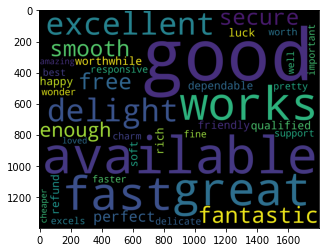

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# positive word cloud
# Choosing the only words which are present in poswords
pos_in_pos = " ".join([w for w in final_list if w in poswords])

wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(pos_in_pos)

plt.imshow(wordcloud_pos)

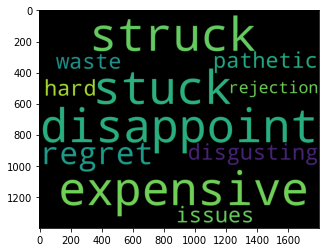

In [13]:
# negative word cloud
# Choosing the only words which are present in negwords
neg_in_neg = " ".join([w for w in final_list if w in negwords])

wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(neg_in_neg)

plt.imshow(wordcloud_neg)

##  Create audible files (Text to Audio)

In [1]:
# import necessary libraries
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'

from gtts import gTTS
import os

# read image using cv2.imread() method
rev = cv2.imread("Reviews\\15.PNG")

# display the image using cv2.imshow() method
# cv2.imshow("Image", rev)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# grab the text from image using pytesseract
txt = pytesseract.image_to_string(rev)
print(txt)

# set language
language = 'en'

# create a gTTS object
outObj = gTTS(text=txt, lang=language, slow=False)

# Save the audio file as rev.mp3
outObj.save("rev.mp3")

# play the .mp3 file
print('playing the audio file')
os.system('rev.mp3')

Okay so | brought the 32gb version. And honestly | had to sell it to someone else on OLX after 3 days of usage. Reason being that the memory available remain is on 17GB.
Which will get filled in matter of days. If you install couple of good games (3-4).

Further the sound from speaker is pathetic.

Didn't expect both these from Apple.

So | sold this on OLX and brought Galaxy Tab S6 Lite (Wi-Fi) tab. It has 64gb hard drive and memory card support as well. Sound is also pretty good.

Please don't waste your money on Apple. Useless product with high price

playing the audio file


0

#### Build sample OCR Script

In [ ]:
import cv2

import pytesseract
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'

img = cv2.imread("image.jpg")

img = cv2.resize(img, (400, 450))

cv2.imshow("Image", img)

text = pytesseract.image_to_string(img)
print(text)

cv2.waitKey(0)

cv2.destroyAllWindows()